In [3]:
import numpy as np
from sklearn.datasets import make_circles, make_moons
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
import networkx as nx
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns

If the graph ($W$) has $K$ connected components, then Laplacian $L$ has $K$ eigenvectors with an eigenvalue of 0.

In [4]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

[[0 1 1 1 1 0 0 0 0]
 [1 0 1 0 1 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 1 0 1]
 [0 0 0 0 0 1 0 1 0]]


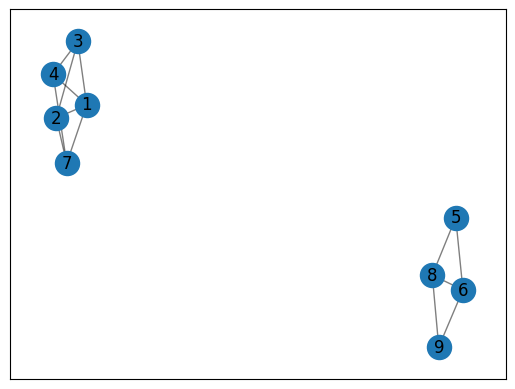

In [5]:
G = nx.Graph()
G.add_edges_from([
    [1, 2],
    [1, 3],
    [1, 4],
    [2, 3],
    [2, 7],
    [3, 4],
    [4, 7],
    [1, 7],
    [6, 5],
    [5, 8],
    [6, 8],
    [9, 8],
    [9, 6]
])
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

In [6]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[4 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 2]]
laplacian matrix:
[[ 4 -1 -1 -1 -1  0  0  0  0]
 [-1  3 -1  0 -1  0  0  0  0]
 [-1 -1  3 -1  0  0  0  0  0]
 [-1  0 -1  3 -1  0  0  0  0]
 [-1 -1  0 -1  3  0  0  0  0]
 [ 0  0  0  0  0  3 -1 -1 -1]
 [ 0  0  0  0  0 -1  2 -1  0]
 [ 0  0  0  0  0 -1 -1  3 -1]
 [ 0  0  0  0  0 -1  0 -1  2]]


In [7]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[5.00000000e+00 0.00000000e+00 3.00000000e+00 5.00000000e+00
 3.00000000e+00 4.00000000e+00 1.11022302e-16 4.00000000e+00
 2.00000000e+00]
eigenvectors:
[[ 8.94427191e-01 -4.47213595e-01  5.23364153e-17  4.99220576e-02
   1.55050611e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-2.23606798e-01 -4.47213595e-01 -7.07106781e-01  4.86740062e-01
  -2.09485763e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-2.23606798e-01 -4.47213595e-01 -3.53636755e-16 -5.11701091e-01
  -6.75363395e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-2.23606798e-01 -4.47213595e-01  7.07106781e-01  4.86740062e-01
   2.09485763e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-2.23606798e-01 -4.47213595e-01  1.66336578e-16 -5.11701091e-01
   6.75363395e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000

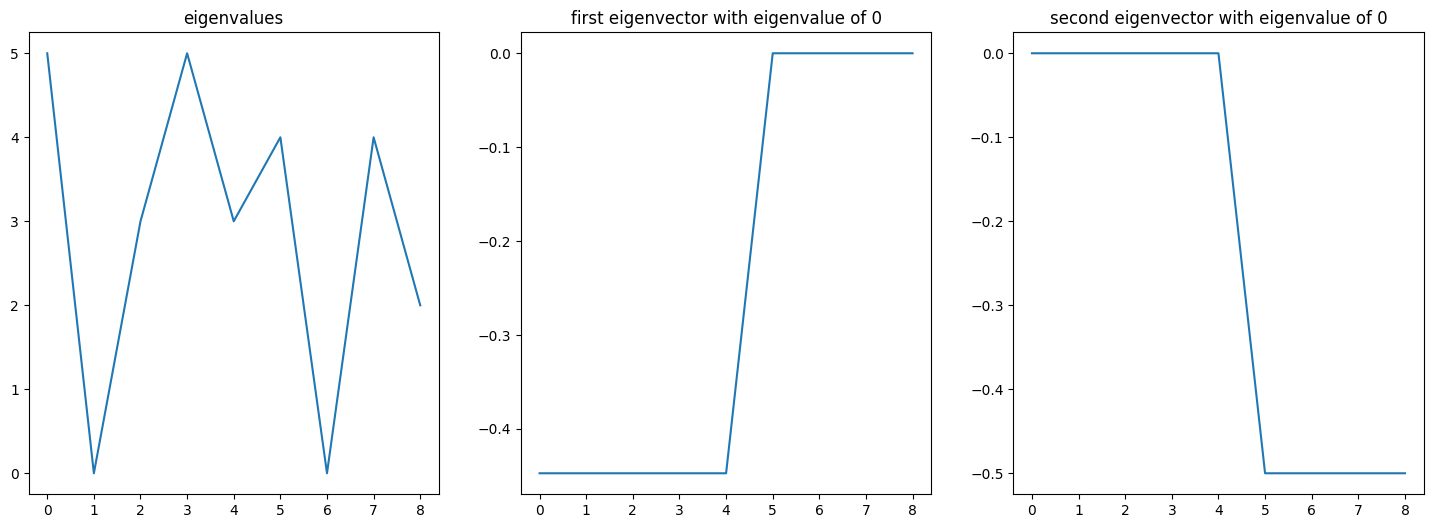

In [8]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(131)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(132)
plt.plot(v[:, i[0]])
ax2.title.set_text('first eigenvector with eigenvalue of 0')
ax3 = plt.subplot(133)
plt.plot(v[:, i[1]])
ax3.title.set_text('second eigenvector with eigenvalue of 0')

If we take a closer look at the plot of each eigenvector, we can clearly see that the first 5 nodes are mapped to the same value and the other 5 nodes are mapped to another value. We can use this fact to place the nodes into one of two categories.

### Another Example with seemingly 2 components

[[0 1 1 1 1 0 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0]
 [1 1 0 1 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0]
 [0 1 0 0 0 1 0 1 0 1]
 [0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


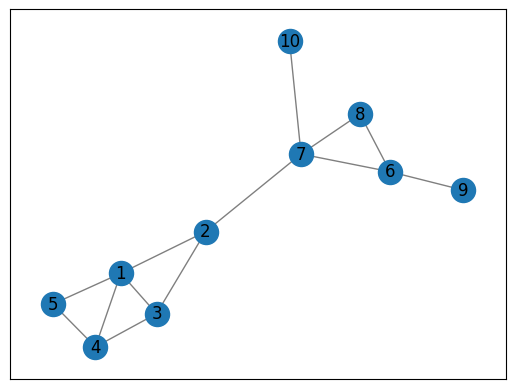

In [9]:
G = nx.Graph()
G.add_edges_from([
    [1, 2],
    [1, 3],
    [1, 4],
    [2, 3],
    [3, 4],
    [4, 5],
    [1, 5],
    [6, 7],
    [7, 8],
    [6, 8],
    [6, 9],
    [9, 6],
    [7, 10],
    [7, 2]
])
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

In [10]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[4 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]
laplacian matrix:
[[ 4 -1 -1 -1 -1  0  0  0  0  0]
 [-1  3 -1  0  0  0 -1  0  0  0]
 [-1 -1  3 -1  0  0  0  0  0  0]
 [-1  0 -1  3 -1  0  0  0  0  0]
 [-1  0  0 -1  2  0  0  0  0  0]
 [ 0  0  0  0  0  3 -1 -1 -1  0]
 [ 0 -1  0  0  0 -1  4 -1  0 -1]
 [ 0  0  0  0  0 -1 -1  2  0  0]
 [ 0  0  0  0  0 -1  0  0  1  0]
 [ 0  0  0  0  0  0 -1  0  0  1]]


In [11]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[5.48523745e+00 4.89774118e+00 4.39797510e+00 3.80064529e+00
 3.15504718e+00 5.42332238e-16 2.29183391e-01 7.27945654e-01
 1.91282197e+00 1.39340278e+00]
eigenvectors:
[[-0.42961548  0.77259036 -0.02082245  0.0679864  -0.04906008 -0.31622777
  -0.32022645 -0.04739336 -0.07842655  0.01141153]
 [ 0.47787378 -0.01396458  0.23244717  0.12288606 -0.53188538 -0.31622777
  -0.15401246  0.05370055 -0.52524116 -0.13009628]
 [-0.09240526 -0.34518261 -0.59171148  0.02064329  0.3778383  -0.31622777
  -0.30263439 -0.03168161 -0.43048912 -0.03297957]
 [ 0.1813907  -0.10355853  0.61557319 -0.20740041  0.5223627  -0.31622777
  -0.36430549 -0.07828952  0.1356494   0.06569986]
 [ 0.07122177 -0.23088047 -0.24802207  0.07742447 -0.40976908 -0.31622777
  -0.38656287 -0.09880307  0.65639071  0.12712125]
 [ 0.24027504  0.20257544 -0.24415589 -0.74398292 -0.02814518 -0.31622777
   0.33767473 -0.16401632  0.08339946 -0.19858302]
 [-0.66560909 -0.4009066   0.28757856 -0.18701783 -0.24631088 -0.3162

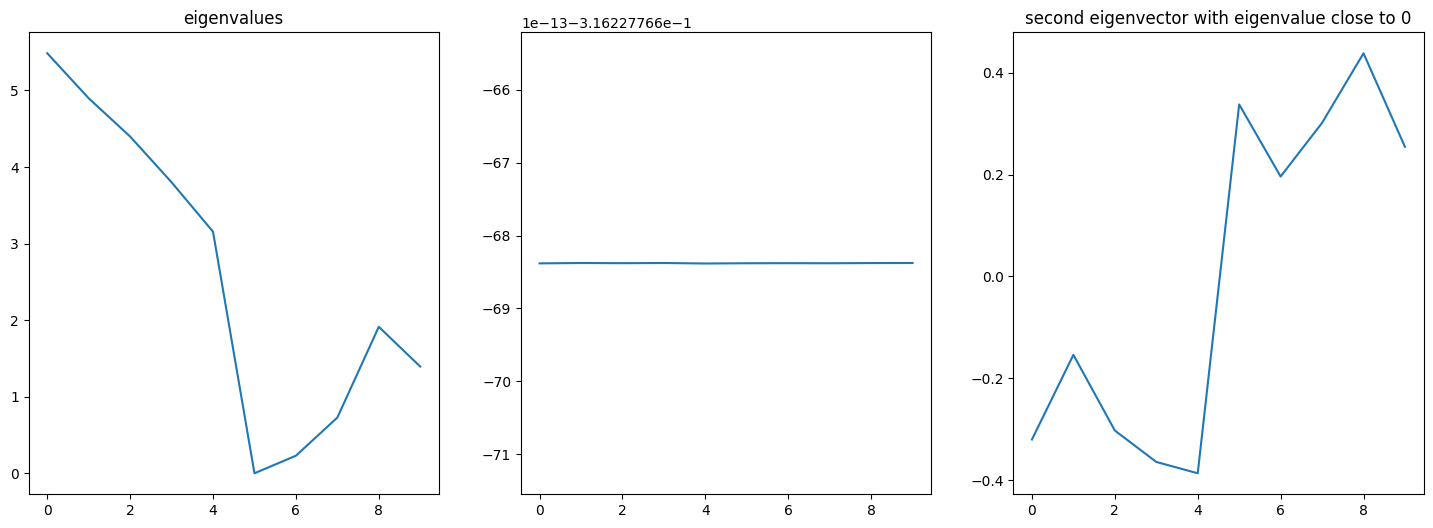

In [12]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(131)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 0.5)[0]
ax2 = plt.subplot(132)
plt.plot(v[:, i[0]])
ax3 = plt.subplot(133)
plt.plot(v[:, i[1]])
ax3.title.set_text('second eigenvector with eigenvalue close to 0')

Because we have a single component, only 1 eigenvalue will be equal to 0. However, if we look at the second smallest eigenvalue, we can still observe a distinction between the two classes. If we drew a horizontal line across, we’d correctly classify the nodes.

### Another Example with seemingly 3 components

[[0 1 1 1 1 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0]
 [0 1 0 0 0 1 0 1 0 1 0 1 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 1 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 1 0]]


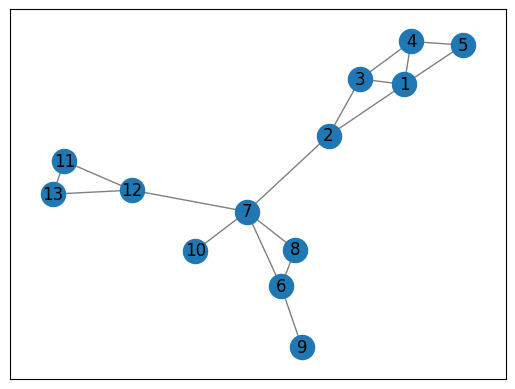

In [13]:
G = nx.Graph()
G.add_edges_from([
    [1, 2],
    [1, 3],
    [1, 4],
    [2, 3],
    [3, 4],
    [4, 5],
    [1, 5],
    [6, 7],
    [7, 8],
    [6, 8],
    [6, 9],
    [9, 6],
    [7, 10],
    [7, 2],
    [11, 12],
    [12, 13],
    [7, 12],
    [11, 13]
])
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

In [14]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[4 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2]]
laplacian matrix:
[[ 4 -1 -1 -1 -1  0  0  0  0  0  0  0  0]
 [-1  3 -1  0  0  0 -1  0  0  0  0  0  0]
 [-1 -1  3 -1  0  0  0  0  0  0  0  0  0]
 [-1  0 -1  3 -1  0  0  0  0  0  0  0  0]
 [-1  0  0 -1  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 -1 -1 -1  0  0  0  0]
 [ 0 -1  0  0  0 -1  5 -1  0 -1  0 -1  0]
 [ 0  0  0  0  0 -1 -1  2  0  0  0  0  0]
 [ 0  0  0  0  0 -1  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 -1  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2 -1 -1]
 [ 0  0  0  0  0  0 -1  0  0  0 -1  3 -1]
 [ 0  0  0  0  0  0  0  0  0  0 -1 -1  2]]


In [15]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[6.33320600e+00 5.02009550e+00 2.65485690e-16 1.83813342e-01
 3.48195500e-01 7.71914030e-01 1.42112787e+00 1.91532249e+00
 4.47101493e+00 3.86188722e+00 3.53516066e+00 3.13826246e+00
 3.00000000e+00]
eigenvectors:
[[-1.35753948e-01  8.67324919e-01 -2.77350098e-01  3.47136293e-01
  -7.82787336e-02  4.01543283e-02  9.39824208e-03 -7.94107462e-02
   8.62376751e-02  1.48652029e-02 -9.22042486e-02  3.99726101e-02
  -5.95368334e-17]
 [ 3.11935876e-01 -2.53464349e-01 -2.77350098e-01  2.05034604e-01
  -1.35048508e-02 -5.36548189e-02 -1.26570558e-01 -5.27117964e-01
   3.17606059e-01  2.30538340e-02 -2.98527810e-01  4.81695911e-01
  -5.74198130e-16]
 [-6.96943182e-02 -1.89335283e-01 -2.77350098e-01  3.32557416e-01
  -7.08196318e-02  2.50053806e-02 -3.48666234e-02 -4.34395065e-01
  -6.67086251e-01  7.54763748e-03  7.30180086e-02 -3.54724168e-01
   2.65882242e-16]
 [ 5.61235908e-02 -2.31385216e-01 -2.77350098e-01  3.84372860e-01
  -9.60162338e-02  6.92146284e-02  6.21223763e-02  1.353

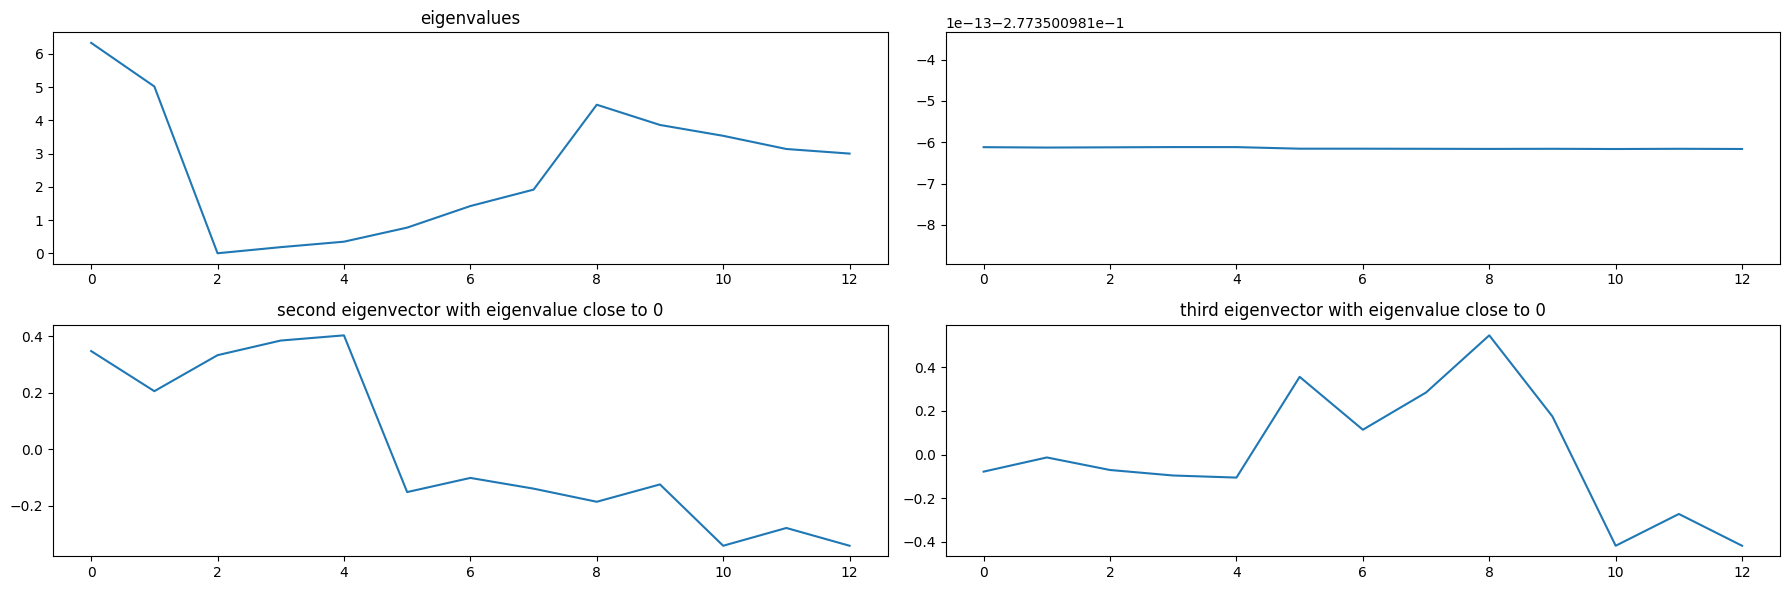

In [16]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(221)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 0.5)[0]
ax2 = plt.subplot(222)
plt.plot(v[:, i[0]])
ax3 = plt.subplot(223)
plt.plot(v[:, i[1]])
ax3.title.set_text('second eigenvector with eigenvalue close to 0')
ax4 = plt.subplot(224)
plt.plot(v[:, i[2]])
ax4.title.set_text('third eigenvector with eigenvalue close to 0')
fig.tight_layout()

Since we only have 1 component, 1 eigenvalue will be equal to 0. However, we can again use the the second smallest eigenvalue to figure out which node should be placed in which category.
In practice, we use k-means to classify the nodes based off their corresponding values in the eigenvector.

In [17]:
U = np.array(v[:, i[1]]).reshape(-1, 1)
km = KMeans(init='k-means++', n_clusters=3)
km.fit(U)
km.labels_

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2], dtype=int32)

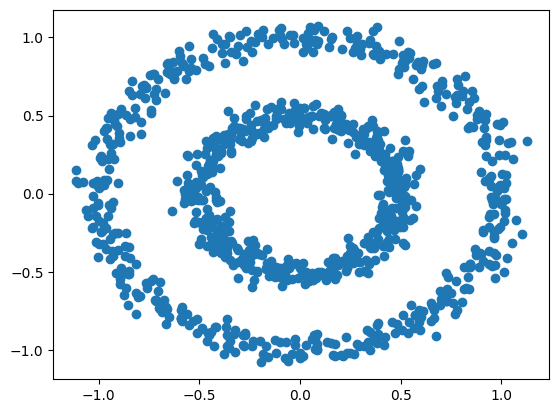

In [18]:
X, clusters = make_circles(n_samples=1000, noise=.05, factor=.5, random_state=0)
plt.scatter(X[:,0], X[:,1])

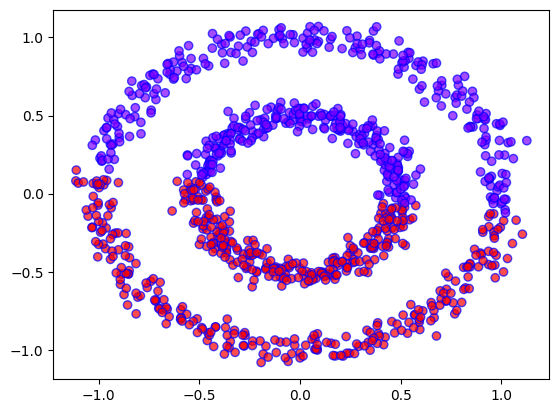

In [19]:
km = KMeans(init='k-means++', n_clusters=2)
km_clustering = km.fit(X)
plt.scatter(X[:,0], X[:,1], c=km_clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')

/home/mb600l/conda_env/pytorch_GPU_3.9/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


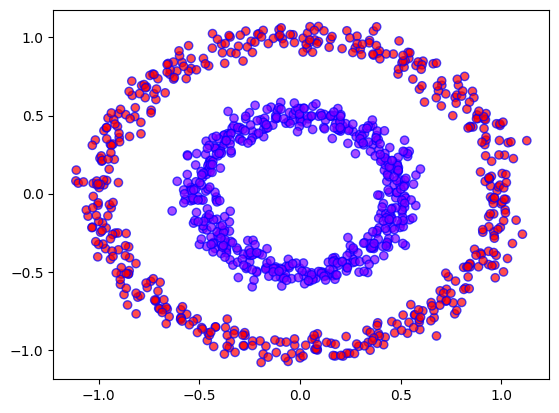

In [20]:
sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=0)
sc_clustering = sc.fit(X)
plt.scatter(X[:,0], X[:,1], c=sc_clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')

### from scratch

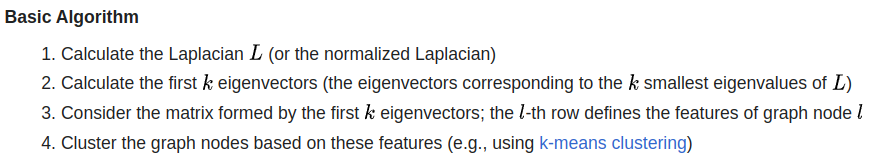

In [21]:
def rbf_kernel(X, gamma=1.0):
    pairwise_sq_dists = np.sum((X[:, np.newaxis] - X[np.newaxis, :]) ** 2, axis=2)
    return np.exp(- pairwise_sq_dists/(2*gamma**2))

# Compute the similarity matrix
similarity_matrix = rbf_kernel(X, gamma=0.1)

# Degree matrix
degree_matrix = np.diag(similarity_matrix.sum(axis=1))

# Laplacian matrix
laplacian_matrix = degree_matrix - similarity_matrix

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigh(laplacian_matrix)

# Select the eigenvectors corresponding to the smallest k eigenvalues
k = 2
selected_eigenvectors = eigenvectors[:, :k]


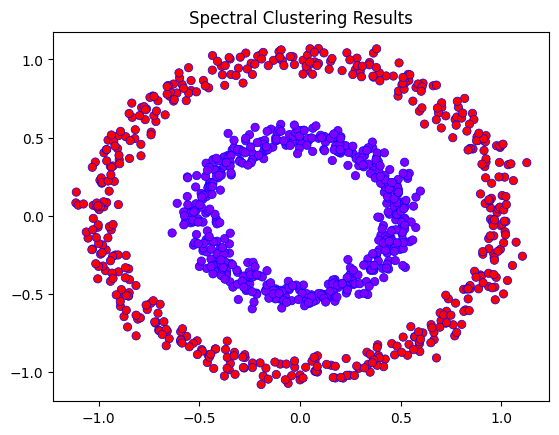

In [22]:
from sklearn.cluster import KMeans

# Perform k-means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10)
kmeans.fit(selected_eigenvectors)
labels = kmeans.labels_


# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', lw=0.5, edgecolor='b')
plt.title("Spectral Clustering Results")
plt.show()